In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults


In [3]:
import warnings

warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('Walmart.csv', parse_dates = ['Date'], index_col = 'Date')

In [7]:
data.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
05-02-2010      1    1643690.90             0        42.31       2.572   
12-02-2010      1    1641957.44             1        38.51       2.548   
19-02-2010      1    1611968.17             0        39.93       2.514   
26-02-2010      1    1409727.59             0        46.63       2.561   
05-03-2010      1    1554806.68             0        46.50       2.625   

                   CPI  Unemployment  
Date                                  
05-02-2010  211.096358         8.106  
12-02-2010  211.242170         8.106  
19-02-2010  211.289143         8.106  
26-02-2010  211.319643         8.106  
05-03-2010  211.350143         8.106

In [233]:
store_data = data[data['Store'] == 1 ]['Weekly_Sales']

In [9]:
data['Store'] ==1

Date
05-02-2010     True
12-02-2010     True
19-02-2010     True
26-02-2010     True
05-03-2010     True
              ...  
28-09-2012    False
05-10-2012    False
12-10-2012    False
19-10-2012    False
26-10-2012    False
Name: Store, Length: 6435, dtype: bool

In [7]:
store_data = data[data['Store'] == 1]['Weekly_Sales']

In [235]:
store_data

Date
05-02-2010   1643690.90
12-02-2010   1641957.44
19-02-2010   1611968.17
26-02-2010   1409727.59
05-03-2010   1554806.68
                ...    
28-09-2012   1437059.26
05-10-2012   1670785.97
12-10-2012   1573072.81
19-10-2012   1508068.77
26-10-2012   1493659.74
Name: Weekly_Sales, Length: 143, dtype: float64

In [15]:
store_data.tail(12)

Date
10-08-2012    1592409.97
17-08-2012    1597868.05
24-08-2012    1494122.38
31-08-2012    1582083.40
07-09-2012    1661767.33
14-09-2012    1517428.87
21-09-2012    1506126.06
28-09-2012    1437059.26
05-10-2012    1670785.97
12-10-2012    1573072.81
19-10-2012    1508068.77
26-10-2012    1493659.74
Name: Weekly_Sales, dtype: float64

In [ ]:
# ploting to see trend and seasonality factors

In [11]:
store_data.plot()    

<Axes: xlabel='Date'>

In [229]:
result = adfuller(store_data)
result[1]

1.3877788330759535e-05

In [231]:
p_value = result[1]
p_value

1.3877788330759535e-05

In [237]:
log_data = np.log(store_data)

In [239]:
log_data.head(5)

Date
05-02-2010   14.31
12-02-2010   14.31
19-02-2010   14.29
26-02-2010   14.16
05-03-2010   14.26
Name: Weekly_Sales, dtype: float64

In [125]:
log_data.tail(5)

Date
28-09-2012   14.18
05-10-2012   14.33
12-10-2012   14.27
19-10-2012   14.23
26-10-2012   14.22
Name: Weekly_Sales, dtype: float64

In [127]:
log_data.shape

(143,)

In [129]:
log_data.dtype

dtype('float64')

In [35]:
np.log(1592409.97)        # 1st value from store_data.tail(5)

14.2807591310784

In [37]:
np.log(1643690.90)         # 1st value from store_data.head(5)

14.312454819889215

<Axes: xlabel='Date'>

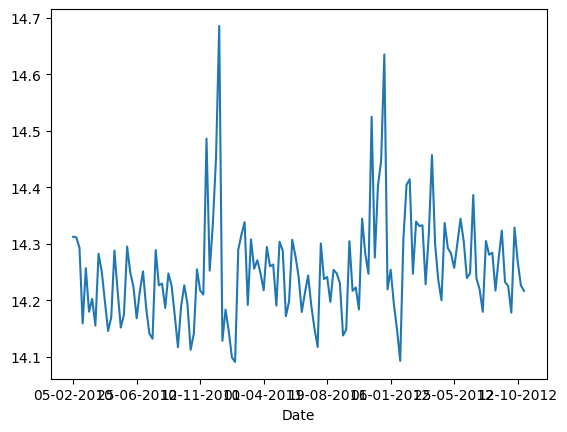

In [131]:
log_data.plot()

In [241]:
mean_log = store_data.rolling(window = 7 ).mean()    
std_log = store_data.rolling(window = 7 ).std()

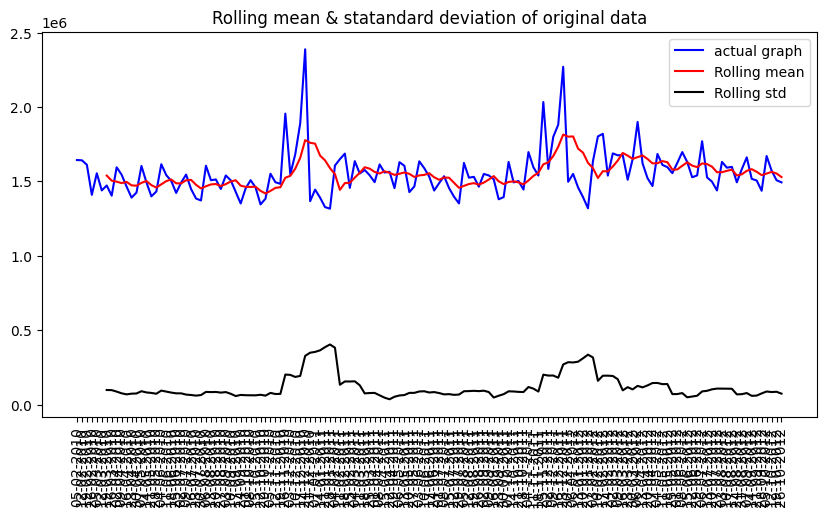

In [243]:
plt.figure(figsize=(10,5))
plt.plot(store_data, color='blue', label = 'actual graph')
plt.plot(mean_log, color = 'red',label = 'Rolling mean')
plt.plot(std_log, color = 'black',label = 'Rolling std')
plt.legend(loc = 'best')
plt.title('Rolling mean & statandard deviation of original data')
plt.xticks(rotation = 90)
plt.show()

In [245]:
mean_log = log_data.rolling(window = 7 ).mean()    
std_log = log_data.rolling(window = 7 ).std()

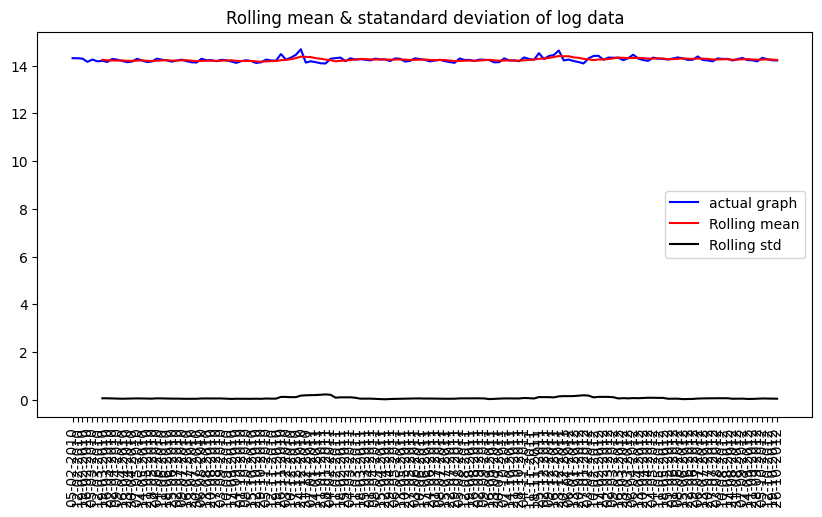

In [247]:
plt.figure(figsize=(10,5))
plt.plot(log_data, color='blue', label = 'actual graph')
plt.plot(mean_log, color = 'red',label = 'Rolling mean')
plt.plot(std_log, color = 'black',label = 'Rolling std')
plt.legend(loc = 'best')
plt.title('Rolling mean & statandard deviation of log data')
plt.xticks(rotation = 90)
plt.show()

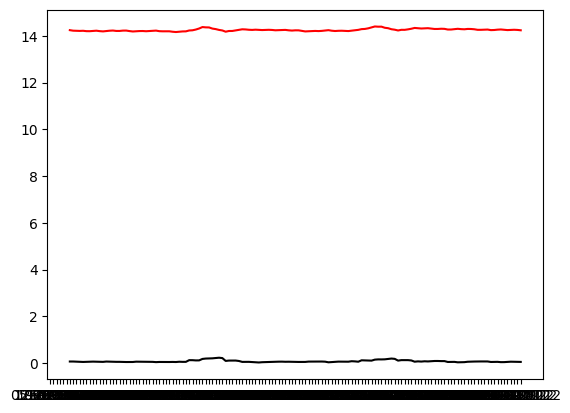

In [45]:
plt.plot(mean_log, color = 'red',label = 'Rolling mean')
plt.plot(std_log, color = 'black',label = 'Rolling std')

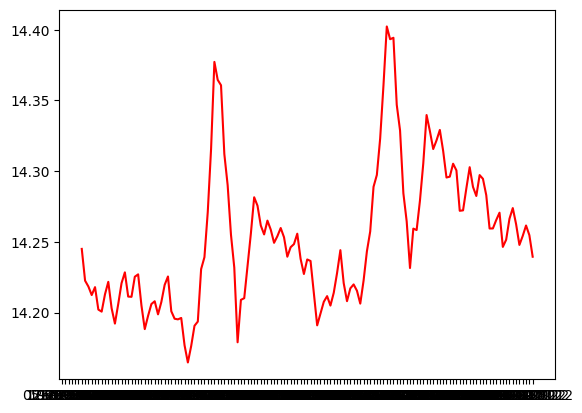

In [47]:
plt.plot(mean_log, color = 'red',label = 'Rolling mean')

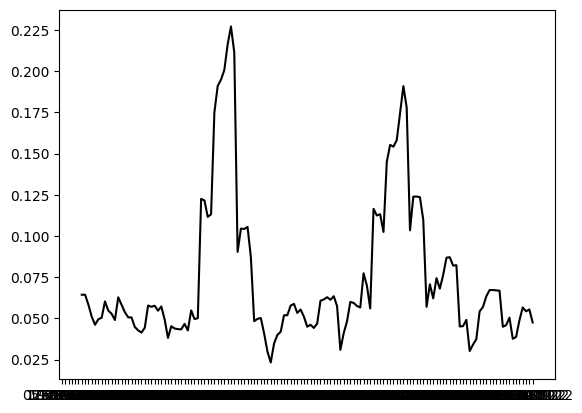

In [49]:
plt.plot(std_log, color = 'black',label = 'Rolling std')

In [249]:
result = adfuller(log_data)
result[1]

1.2527353486501201e-05

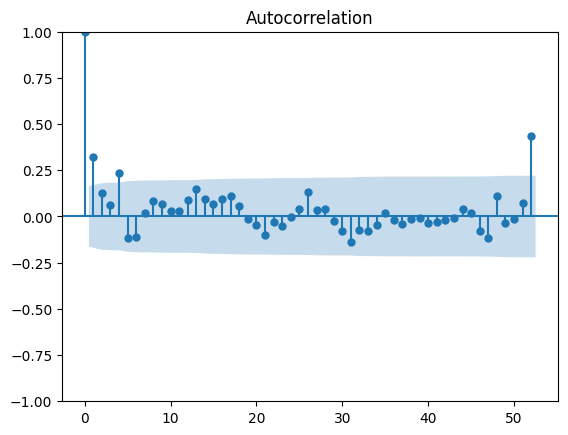

In [251]:
# Plot the ACF
plot_acf(log_data, lags = 52)
plt.show()

In [253]:
decomp_df = seasonal_decompose(store_data.dropna(), period = 52)
decomp_df.plot();

In [255]:
decomp_df = seasonal_decompose(log_data.dropna(), period = 52)
decomp_df.plot();

In [ ]:
# To build ARIMA model for log_data

In [257]:
arima_model = auto_arima(log_data, seasonal = True , trace = True)  

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-225.908, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-243.241, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-269.030, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-227.902, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.62 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-270.985, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-279.521, Time=0.70 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-245.230, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-277.525, Time=0.88 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-277.525, Time=1.29 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-278.221, Time=0.59 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-252.374, T

In [259]:
log_data.head(2)

Date
05-02-2010   14.31
12-02-2010   14.31
Name: Weekly_Sales, dtype: float64

In [261]:
log_data = log_data.reset_index()
log_data.columns = ['Date', 'Weekly_Sales']

In [263]:
log_data

Date  Weekly_Sales
0    05-02-2010         14.31
1    12-02-2010         14.31
2    19-02-2010         14.29
3    26-02-2010         14.16
4    05-03-2010         14.26
..          ...           ...
138  28-09-2012         14.18
139  05-10-2012         14.33
140  12-10-2012         14.27
141  19-10-2012         14.23
142  26-10-2012         14.22

[143 rows x 2 columns]

In [265]:
train = log_data.iloc[:110]['Weekly_Sales']      
test = log_data.iloc[110:]['Weekly_Sales']      
model = ARIMA(train, order = (1,1,1))      
model_fit = model.fit() 
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  110
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 101.394
Date:                Thu, 06 Feb 2025   AIC                           -196.787
Time:                        14:15:16   BIC                           -188.713
Sample:                             0   HQIC                          -193.513
                                - 110                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3134      0.083      3.762      0.000       0.150       0.477
ma.L1         -0.9660      0.047    -20.701      0.000      -1.057      -0.875
sigma2         0.0089      0.001     11.594      0.000       0.007       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                67.56
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               3.97   Skew:                             1.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [267]:
log_data['predict'] = model_fit.predict(start = len(train), end = len(train)+len(test)-1, dynamic = False)

In [269]:
log_data.tail(40)

Date  Weekly_Sales  predict
103  27-01-2012         14.09      NaN
104  03-02-2012         14.31      NaN
105  10-02-2012         14.40      NaN
106  17-02-2012         14.41      NaN
107  24-02-2012         14.25      NaN
108  02-03-2012         14.34      NaN
109  09-03-2012         14.33      NaN
110  16-03-2012         14.33    14.29
111  23-03-2012         14.23    14.28
112  30-03-2012         14.32    14.27
113  06-04-2012         14.46    14.27
114  13-04-2012         14.30    14.27
115  20-04-2012         14.24    14.27
116  27-04-2012         14.20    14.27
117  04-05-2012         14.34    14.27
118  11-05-2012         14.29    14.27
119  18-05-2012         14.28    14.27
120  25-05-2012         14.26    14.27
121  01-06-2012         14.30    14.27
122  08-06-2012         14.34    14.27
123  15-06-2012         14.30    14.27
124  22-06-2012         14.24    14.27
125  29-06-2012         14.25    14.27
126  06-07-2012         14.39    14.27
127  13-07-2012         14.24    14.27
128  20-07-2012         14.22    14.27
129  27-07-2012         14.18    14.27
130  03-08-2012         14.30    14.27
131  10-08-2012         14.28    14.27
132  17-08-2012         14.28    14.27
133  24-08-2012         14.22    14.27
134  31-08-2012         14.27    14.27
135  07-09-2012         14.32    14.27
136  14-09-2012         14.23    14.27
137  21-09-2012         14.23    14.27
138  28-09-2012         14.18    14.27
139  05-10-2012         14.33    14.27
140  12-10-2012         14.27    14.27
141  19-10-2012         14.23    14.27
142  26-10-2012         14.22    14.27

In [57]:
# log_data.drop(columns = ['predict'], inplace = True)

In [163]:
log_data.shape

(143, 3)

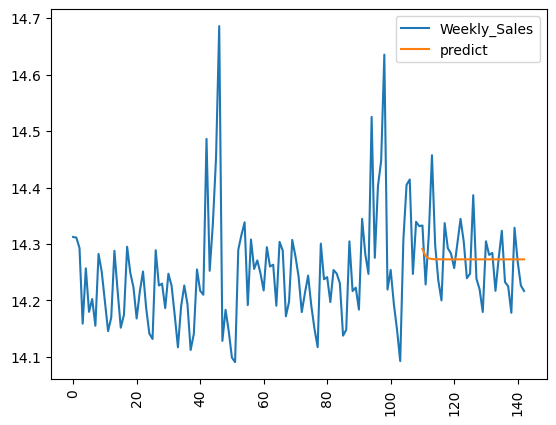

In [271]:
log_data[['Weekly_Sales', 'predict']].plot() 
plt.xticks(rotation=90) 
plt.show()

In [273]:
log_data['predict']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
138   14.27
139   14.27
140   14.27
141   14.27
142   14.27
Name: predict, Length: 143, dtype: float64

In [169]:
log_data['predict'].shape

(143,)

In [275]:
seas_model = SARIMAX(train, order = (1,1,1), seasonal_order = (1,1,1,52))

In [277]:
seas_model_fit = seas_model.fit()

In [279]:
log_data.tail(5)

Date  Weekly_Sales  predict
138  28-09-2012         14.18    14.27
139  05-10-2012         14.33    14.27
140  12-10-2012         14.27    14.27
141  19-10-2012         14.23    14.27
142  26-10-2012         14.22    14.27

In [ ]:
# Forecast from seasonal ARIMA Model

<Axes: >

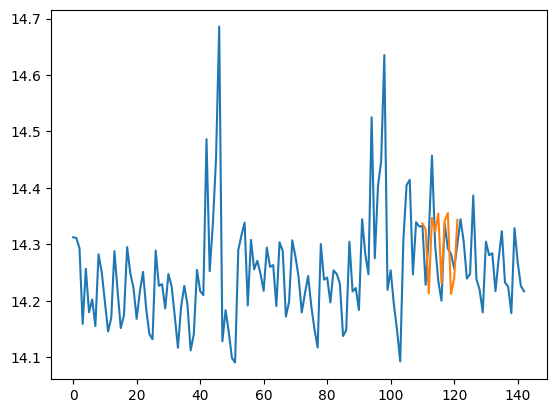

In [281]:
forecast = seas_model_fit.forecast(steps=12)
log_data['Weekly_Sales'].plot()
forecast.plot()

In [283]:
forecast

110   14.34
111   14.33
112   14.21
113   14.35
114   14.32
115   14.35
116   14.23
117   14.34
118   14.36
119   14.21
120   14.24
121   14.34
Name: predicted_mean, dtype: float64

<Axes: >

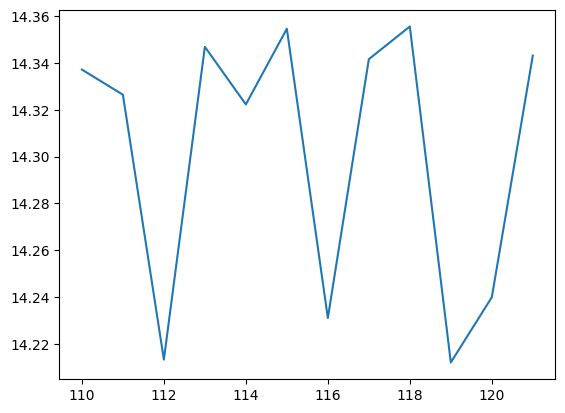

In [183]:
forecast.plot()

In [285]:
log_data.tail(5)

Date  Weekly_Sales  predict
138  28-09-2012         14.18    14.27
139  05-10-2012         14.33    14.27
140  12-10-2012         14.27    14.27
141  19-10-2012         14.23    14.27
142  26-10-2012         14.22    14.27

In [89]:
log_data.index[-1]

142

In [287]:
log_data = log_data.set_index('Date')
log_data.index = pd.to_datetime(log_data.index, format='%d-%m-%Y')

In [289]:
log_data

Weekly_Sales  predict
Date                             
2010-02-05         14.31      NaN
2010-02-12         14.31      NaN
2010-02-19         14.29      NaN
2010-02-26         14.16      NaN
2010-03-05         14.26      NaN
...                  ...      ...
2012-09-28         14.18    14.27
2012-10-05         14.33    14.27
2012-10-12         14.27    14.27
2012-10-19         14.23    14.27
2012-10-26         14.22    14.27

[143 rows x 2 columns]

In [291]:
log_data.index[-1]

Timestamp('2012-10-26 00:00:00')

In [293]:
forecast_values = [14.337163,
    14.326431,
    14.213368,
   14.346869,
    14.322290,
   14.354578,
    14.231121,
   14.341588,
   14.355549,
    14.212150,
   14.239998,
   14.343129]

In [295]:
# Generate future dates
last_date = log_data.index[-1]
future_dates = pd.date_range(start = last_date, periods = 13, freq = 'W')[1:]  # Start from the next period/week 

# Create the DataFrame for forecasted values
log_forecast_df = pd.DataFrame(forecast_values, index = future_dates, columns = ['Forecast'])

# Display the DataFrame
print(log_forecast_df)

            Forecast
2012-11-04     14.34
2012-11-11     14.33
2012-11-18     14.21
2012-11-25     14.35
2012-12-02     14.32
2012-12-09     14.35
2012-12-16     14.23
2012-12-23     14.34
2012-12-30     14.36
2013-01-06     14.21
2013-01-13     14.24
2013-01-20     14.34


In [297]:
# Convert log-transformed forecast values back to the original scale

original_forecast_df = log_forecast_df.copy()

original_forecast_df['Forecast'] = np.exp(log_forecast_df['Forecast'])

# Display the DataFrame with original forecast values
print(original_forecast_df)


             Forecast
2012-11-04 1684809.40
2012-11-11 1666824.70
2012-11-18 1488631.80
2012-11-25 1701241.78
2012-12-02 1659936.66
2012-12-09 1714407.33
2012-12-16 1515295.46
2012-12-23 1692281.20
2012-12-30 1716072.83
2013-01-06 1486819.75
2013-01-13 1528806.62
2013-01-20 1694891.02


In [299]:
original_forecast_df

Forecast
2012-11-04 1684809.40
2012-11-11 1666824.70
2012-11-18 1488631.80
2012-11-25 1701241.78
2012-12-02 1659936.66
2012-12-09 1714407.33
2012-12-16 1515295.46
2012-12-23 1692281.20
2012-12-30 1716072.83
2013-01-06 1486819.75
2013-01-13 1528806.62
2013-01-20 1694891.02

In [ ]:
# pd.options.display.float_format = '{:.2f}'.format


<Axes: >

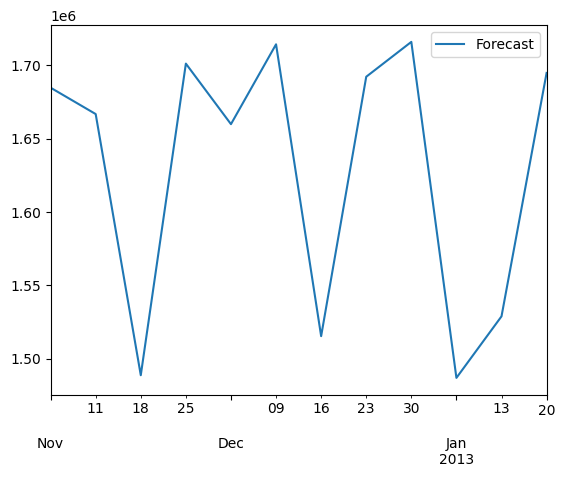

In [301]:
original_forecast_df.plot()

In [ ]:
# Additional 

In [303]:
# Generate forecast interval and range

forecast2 = seas_model_fit.get_forecast(steps = 12)

# Extract forecasted mean and confidence intervals

forecast_values = forecast2.predicted_mean

forecast_lower = forecast2.conf_int().iloc[:, 0]

forecast_upper = forecast2.conf_int().iloc[:, 1]

# Display the forecasted values and confidence intervals
forecast_df = pd.DataFrame({
    'Forecast': forecast_values,
    'Lower CI': forecast_lower,
    'Upper CI': forecast_upper })


print(forecast_df)

     Forecast  Lower CI  Upper CI
110     14.34     14.27     14.40
111     14.33     14.26     14.39
112     14.21     14.15     14.28
113     14.35     14.28     14.41
114     14.32     14.25     14.39
115     14.35     14.29     14.42
116     14.23     14.16     14.30
117     14.34     14.27     14.41
118     14.36     14.29     14.42
119     14.21     14.14     14.28
120     14.24     14.17     14.31
121     14.34     14.27     14.41


In [305]:
forecast_range_df = np.exp(forecast_df)      # this give original scale from log scale forecast in scientific values 

#pd.options.display.float_format = '{:.2f}'.format

forecast_range_df

Forecast   Lower CI   Upper CI
110 1684809.81 1578290.59 1798518.05
111 1666824.74 1559395.54 1781654.91
112 1488631.25 1392224.16 1591714.23
113 1701242.11 1590661.39 1819510.26
114 1659936.28 1551660.28 1775767.86
115 1714408.04 1602189.30 1834486.67
116 1515295.37 1415766.93 1621820.67
117 1692280.75 1580746.01 1811685.20
118 1716073.54 1602585.30 1837598.53
119 1486820.45 1388160.66 1592492.22
120 1528806.97 1427020.37 1637853.82
121 1694891.29 1581670.56 1816216.69

<Axes: >

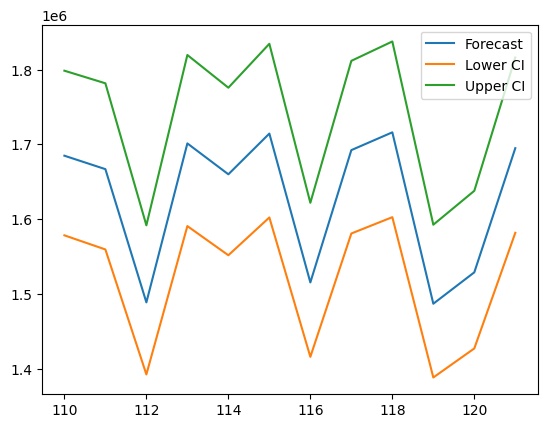

In [307]:
forecast_range_df.plot()

In [ ]:
SECTION 2.B. To get the forecast value for 12 weeks  for 5 stores

In [5]:
df = pd.read_csv('Walmart.csv', parse_dates = ['Date'], index_col = 'Date')

In [7]:
df

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
05-02-2010      1    1643690.90             0        42.31       2.572   
12-02-2010      1    1641957.44             1        38.51       2.548   
19-02-2010      1    1611968.17             0        39.93       2.514   
26-02-2010      1    1409727.59             0        46.63       2.561   
05-03-2010      1    1554806.68             0        46.50       2.625   
...           ...           ...           ...          ...         ...   
28-09-2012     45     713173.95             0        64.88       3.997   
05-10-2012     45     733455.07             0        64.89       3.985   
12-10-2012     45     734464.36             0        54.47       4.000   
19-10-2012     45     718125.53             0        56.47       3.969   
26-10-2012     45     760281.43             0        58.85       3.882   

                   CPI  Unemployment  
Date                                  
05-02-2010  211.096358         8.106  
12-02-2010  211.242170         8.106  
19-02-2010  211.289143         8.106  
26-02-2010  211.319643         8.106  
05-03-2010  211.350143         8.106  
...                ...           ...  
28-09-2012  192.013558         8.684  
05-10-2012  192.170412         8.667  
12-10-2012  192.327265         8.667  
19-10-2012  192.330854         8.667  
26-10-2012  192.308899         8.667  

[6435 rows x 7 columns]

In [ ]:
# initialize empty dataframe to store forecast result of five stores

In [9]:
forecast_results = pd.DataFrame()


In [ ]:
# create a list of selected number of stores

In [11]:
stores = [3, 5, 7, 10, 25]


In [ ]:
# forecast values with ARIMA order (1,0,0)

In [197]:
for store in stores:
    # Filter data for the current store
    store_data = df[df['Store'] == store]['Weekly_Sales']
    
    # Log transform the data
    log_data = np.log(store_data)
    
    # Split the data into training and testing sets
    train = log_data[:110]
    test = log_data[110:]
    
    # ARIMA Model
    arima_model = ARIMA(train, order=(1, 0, 0))
    arima_model_fit = arima_model.fit()
    
    # Make Predictions with ARIMA
    log_data['predict'] = arima_model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)
    
    # Seasonal ARIMA (SARIMAX) Model
    seas_model = SARIMAX(train, order=(1, 0, 0), seasonal_order=(1, 0, 0, 52))
    seas_model_fit = seas_model.fit(disp=False)
    
    # Forecast the next 12 weeks
    forecast = seas_model_fit.forecast(steps=12)
    
    # Convert forecast back to the original scale
    forecast = np.exp(forecast)
    
    # Store the results in a DataFrame
    future_dates = pd.date_range(start=store_data.index[-1], periods=13, freq='W')[1:]  # Start from the next period
    forecast_df = pd.DataFrame({
        'Date': future_dates,
        'Store': store,
        'Forecast': forecast
    })
    
    # Reset the index of forecast_df before concatenating
    forecast_df.reset_index(drop=True, inplace=True)
    
    # Append the forecast_df to the forecast_results DataFrame
    forecast_results = pd.concat([forecast_results, forecast_df])


In [199]:
forecast_results.reset_index(drop=True, inplace=True)
print(forecast_results)


         Date  Store   Forecast
0  2012-11-04      3  433964.54
1  2012-11-11      3  423779.44
2  2012-11-18      3  418261.06
3  2012-11-25      3  426645.37
4  2012-12-02      3  410711.26
5  2012-12-09      3  433382.97
6  2012-12-16      3  411606.32
7  2012-12-23      3  451814.14
8  2012-12-30      3  428269.15
9  2013-01-06      3  408896.34
10 2013-01-13      3  413067.81
11 2013-01-20      3  435281.22
12 2012-11-04      5  366054.38
13 2012-11-11      5  348170.62
14 2012-11-18      5  367373.46
15 2012-11-25      5  360010.89
16 2012-12-02      5  360190.18
17 2012-12-09      5  380098.00
18 2012-12-16      5  358775.12
19 2012-12-23      5  373830.59
20 2012-12-30      5  341682.21
21 2013-01-06      5  349963.59
22 2013-01-13      5  347126.51
23 2013-01-20      5  378338.26
24 2012-11-04      7  649927.40
25 2012-11-11      7  577769.85
26 2012-11-18      7  533817.53
27 2012-11-25      7  520919.86
28 2012-12-02      7  446445.75
29 2012-12-09      7  487282.19
30 2012-

In [ ]:
# to compare weekly sales and forecast values of store number 25 with same season but different time stamp

In [203]:
store_25 = df[df['Store'] == 25]['Weekly_Sales']
store_25

Date
05-02-2010   677231.63
12-02-2010   583364.02
19-02-2010   676260.67
26-02-2010   628516.57
05-03-2010   665750.06
                ...   
28-09-2012   683300.84
05-10-2012   699536.73
12-10-2012   697317.41
19-10-2012   685531.85
26-10-2012   688940.94
Name: Weekly_Sales, Length: 143, dtype: float64

In [219]:
store_25[39:51]

Date
05-11-2010    696314.53
12-11-2010    713250.08
19-11-2010    718056.73
26-11-2010   1115240.61
03-12-2010    885572.96
10-12-2010    964729.18
17-12-2010   1047707.59
24-12-2010   1295391.19
31-12-2010    623092.54
07-01-2011    558794.63
14-01-2011    572360.83
21-01-2011    568093.57
Name: Weekly_Sales, dtype: float64

In [217]:
forecast_results[48:60]

Date  Store  Forecast
48 2012-11-04     25 647528.39
49 2012-11-11     25 661383.23
50 2012-11-18     25 663579.54
51 2012-11-25     25 695972.61
52 2012-12-02     25 723785.18
53 2012-12-09     25 811678.81
54 2012-12-16     25 696642.45
55 2012-12-23     25 707570.47
56 2012-12-30     25 734717.51
57 2013-01-06     25 727412.55
58 2013-01-13     25 770702.41
59 2013-01-20     25 791246.50

In [ ]:
# forecast values with ARIMA order (1,1,1)

In [13]:
for store in stores:
    # Filter data for the current store
    store_data = df[df['Store'] == store]['Weekly_Sales']
    
    # Log transform the data
    log_data = np.log(store_data)
    
    # Split the data into training and testing sets
    train = log_data[:110]
    test = log_data[110:]
    
    # ARIMA Model
    arima_model = ARIMA(train, order=(1, 1, 1))
    arima_model_fit = arima_model.fit()
    
    # Make Predictions with ARIMA
    log_data['predict'] = arima_model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)
    
    # Seasonal ARIMA (SARIMAX) Model
    seas_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
    seas_model_fit = seas_model.fit(disp=False)
    
    # Forecast the next 12 weeks
    forecast = seas_model_fit.forecast(steps=12)
    
    # Convert forecast back to the original scale
    forecast = np.exp(forecast)
    
    # Store the results in a DataFrame
    future_dates = pd.date_range(start=store_data.index[-1], periods=13, freq='W')[1:]  # Start from the next period
    forecast_df = pd.DataFrame({
        'Date': future_dates,
        'Store': store,
        'Forecast': forecast
    })
    
    # Reset the index of forecast_df before concatenating
    forecast_df.reset_index(drop=True, inplace=True)
    
    # Append the forecast_df to the forecast_results DataFrame
    forecast_results = pd.concat([forecast_results, forecast_df])


In [15]:
forecast_results.reset_index(drop=True, inplace=True)
print(forecast_results)

         Date  Store      Forecast
0  2012-11-04      3  4.251243e+05
1  2012-11-11      3  4.163904e+05
2  2012-11-18      3  3.521455e+05
3  2012-11-25      3  3.743917e+05
4  2012-12-02      3  3.921134e+05
5  2012-12-09      3  4.608006e+05
6  2012-12-16      3  3.886073e+05
7  2012-12-23      3  4.431657e+05
8  2012-12-30      3  4.045337e+05
9  2013-01-06      3  3.995907e+05
10 2013-01-13      3  4.029817e+05
11 2013-01-20      3  4.091842e+05
12 2012-11-04      5  3.314317e+05
13 2012-11-11      5  3.156972e+05
14 2012-11-18      5  3.615476e+05
15 2012-11-25      5  3.558990e+05
16 2012-12-02      5  3.430868e+05
17 2012-12-09      5  3.411155e+05
18 2012-12-16      5  3.376296e+05
19 2012-12-23      5  3.670965e+05
20 2012-12-30      5  3.283752e+05
21 2013-01-06      5  3.357362e+05
22 2013-01-13      5  3.397250e+05
23 2013-01-20      5  3.728836e+05
24 2012-11-04      7  6.605400e+05
25 2012-11-11      7  5.833180e+05
26 2012-11-18      7  5.029316e+05
27 2012-11-25      7

In [17]:
pd.options.display.float_format = '{:.2f}'.format

In [19]:
print(forecast_results)

         Date  Store   Forecast
0  2012-11-04      3  425124.29
1  2012-11-11      3  416390.43
2  2012-11-18      3  352145.53
3  2012-11-25      3  374391.73
4  2012-12-02      3  392113.36
5  2012-12-09      3  460800.64
6  2012-12-16      3  388607.27
7  2012-12-23      3  443165.72
8  2012-12-30      3  404533.72
9  2013-01-06      3  399590.70
10 2013-01-13      3  402981.71
11 2013-01-20      3  409184.22
12 2012-11-04      5  331431.71
13 2012-11-11      5  315697.18
14 2012-11-18      5  361547.58
15 2012-11-25      5  355899.04
16 2012-12-02      5  343086.82
17 2012-12-09      5  341115.55
18 2012-12-16      5  337629.56
19 2012-12-23      5  367096.53
20 2012-12-30      5  328375.17
21 2013-01-06      5  335736.19
22 2013-01-13      5  339725.00
23 2013-01-20      5  372883.55
24 2012-11-04      7  660540.01
25 2012-11-11      7  583318.05
26 2012-11-18      7  502931.58
27 2012-11-25      7  515247.36
28 2012-12-02      7  437540.33
29 2012-12-09      7  501795.09
30 2012-

In [ ]:
# compare between forecast and weekly sales for store number 3 

In [27]:
forecast_results[0:12]

Date  Store  Forecast
0  2012-11-04      3 425124.29
1  2012-11-11      3 416390.43
2  2012-11-18      3 352145.53
3  2012-11-25      3 374391.73
4  2012-12-02      3 392113.36
5  2012-12-09      3 460800.64
6  2012-12-16      3 388607.27
7  2012-12-23      3 443165.72
8  2012-12-30      3 404533.72
9  2013-01-06      3 399590.70
10 2013-01-13      3 402981.71
11 2013-01-20      3 409184.22

In [39]:
df[df['Store'] == 3]['Weekly_Sales'][39:51]

Date
05-11-2010   423175.56
12-11-2010   386635.03
19-11-2010   372545.32
26-11-2010   565567.84
03-12-2010   476420.77
10-12-2010   467642.03
17-12-2010   498159.39
24-12-2010   605990.41
31-12-2010   382677.76
07-01-2011   378241.34
14-01-2011   381061.10
21-01-2011   350876.70
Name: Weekly_Sales, dtype: float64

In [ ]:
SECTION 2.C. To get the forecast values for 12 weeks  for all 45 stores.

In [67]:
df = pd.read_csv('Walmart.csv', parse_dates = ['Date'], index_col = 'Date')

In [69]:
df

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price    CPI  \
Date                                                                            
05-02-2010      1    1643690.90             0        42.31        2.57 211.10   
12-02-2010      1    1641957.44             1        38.51        2.55 211.24   
19-02-2010      1    1611968.17             0        39.93        2.51 211.29   
26-02-2010      1    1409727.59             0        46.63        2.56 211.32   
05-03-2010      1    1554806.68             0        46.50        2.62 211.35   
...           ...           ...           ...          ...         ...    ...   
28-09-2012     45     713173.95             0        64.88        4.00 192.01   
05-10-2012     45     733455.07             0        64.89        3.98 192.17   
12-10-2012     45     734464.36             0        54.47        4.00 192.33   
19-10-2012     45     718125.53             0        56.47        3.97 192.33   
26-10-2012     45     760281.43             0        58.85        3.88 192.31   

            Unemployment  
Date                      
05-02-2010          8.11  
12-02-2010          8.11  
19-02-2010          8.11  
26-02-2010          8.11  
05-03-2010          8.11  
...                  ...  
28-09-2012          8.68  
05-10-2012          8.67  
12-10-2012          8.67  
19-10-2012          8.67  
26-10-2012          8.67  

[6435 rows x 7 columns]

In [43]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [73]:
stores2 = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]

In [49]:
print(stores2)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]


In [71]:
forecast_result2 = pd.DataFrame()

In [75]:
for store in stores2:
    # Filter data for the current store
    store_data = df[df['Store'] == store]['Weekly_Sales']
    
    # Log transform the data
    log_data = np.log(store_data)
    
    # Split the data into training and testing sets
    train = log_data[:110]
    test = log_data[110:]
    
    # ARIMA Model
    arima_model = ARIMA(train, order=(1, 1, 1))
    arima_model_fit = arima_model.fit()
    
    # Make Predictions with ARIMA
    log_data['predict'] = arima_model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)
    
    # Seasonal ARIMA (SARIMAX) Model
    seas_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
    seas_model_fit = seas_model.fit(disp=False)
    
    # Forecast the next 12 weeks
    forecast = seas_model_fit.forecast(steps=12)
    
    # Convert forecast back to the original scale
    forecast = np.exp(forecast)
    
    # Store the results in a DataFrame
    future_dates = pd.date_range(start=store_data.index[-1], periods=13, freq='W')[1:]  # Start from the next period
    forecast_df = pd.DataFrame({
        'Date': future_dates,
        'Store': store,
        'Forecast': forecast
    })
    
    # Reset the index of forecast_df before concatenating
    forecast_df.reset_index(drop=True, inplace=True)
    
    # Append the forecast_df to the forecast_results DataFrame
    forecast_result2 = pd.concat([forecast_result2, forecast_df])

In [77]:
forecast_result2.reset_index(drop=True, inplace=True)
print(forecast_result2)

          Date  Store   Forecast
0   2012-11-04      1 1684809.81
1   2012-11-11      1 1666824.74
2   2012-11-18      1 1488631.25
3   2012-11-25      1 1701242.11
4   2012-12-02      1 1659936.28
..         ...    ...        ...
535 2012-12-23     45  843924.55
536 2012-12-30     45  831891.89
537 2013-01-06     45  755119.29
538 2013-01-13     45  854127.89
539 2013-01-20     45  919479.91

[540 rows x 3 columns]


In [81]:
forecast_result2[:36]

Date  Store   Forecast
0  2012-11-04      1 1684809.81
1  2012-11-11      1 1666824.74
2  2012-11-18      1 1488631.25
3  2012-11-25      1 1701242.11
4  2012-12-02      1 1659936.28
5  2012-12-09      1 1714408.04
6  2012-12-16      1 1515295.37
7  2012-12-23      1 1692280.75
8  2012-12-30      1 1716073.54
9  2013-01-06      1 1486820.45
10 2013-01-13      1 1528806.97
11 2013-01-20      1 1694891.29
12 2012-11-04      2 1901002.48
13 2012-11-11      2 1744469.11
14 2012-11-18      2 1863648.21
15 2012-11-25      2 1863376.90
16 2012-12-02      2 1844680.67
17 2012-12-09      2 1847736.00
18 2012-12-16      2 1746836.40
19 2012-12-23      2 1883020.93
20 2012-12-30      2 1834355.95
21 2013-01-06      2 1735907.62
22 2013-01-13      2 1829819.40
23 2013-01-20      2 1967473.93
24 2012-11-04      3  425124.29
25 2012-11-11      3  416390.43
26 2012-11-18      3  352145.53
27 2012-11-25      3  374391.73
28 2012-12-02      3  392113.36
29 2012-12-09      3  460800.64
30 2012-12-16      3  388607.27
31 2012-12-23      3  443165.72
32 2012-12-30      3  404533.72
33 2013-01-06      3  399590.70
34 2013-01-13      3  402981.71
35 2013-01-20      3  409184.22

In [85]:
forecast_result2[504:540]

Date  Store  Forecast
504 2012-11-04     43 672461.71
505 2012-11-11     43 623082.89
506 2012-11-18     43 650496.04
507 2012-11-25     43 692999.72
508 2012-12-02     43 675775.14
509 2012-12-09     43 649045.83
510 2012-12-16     43 635875.26
511 2012-12-23     43 691499.00
512 2012-12-30     43 700354.70
513 2013-01-06     43 676694.97
514 2013-01-13     43 626658.52
515 2013-01-20     43 679509.53
516 2012-11-04     44 308146.77
517 2012-11-11     44 314365.27
518 2012-11-18     44 320658.48
519 2012-11-25     44 302170.30
520 2012-12-02     44 318922.12
521 2012-12-09     44 314220.64
522 2012-12-16     44 310489.91
523 2012-12-23     44 326474.89
524 2012-12-30     44 330072.02
525 2013-01-06     44 313574.52
526 2013-01-13     44 334719.56
527 2013-01-20     44 327459.92
528 2012-11-04     45 759669.04
529 2012-11-11     45 742362.10
530 2012-11-18     45 723760.34
531 2012-11-25     45 771693.98
532 2012-12-02     45 795290.65
533 2012-12-09     45 856297.00
534 2012-12-16     45 826094.70
535 2012-12-23     45 843924.55
536 2012-12-30     45 831891.89
537 2013-01-06     45 755119.29
538 2013-01-13     45 854127.89
539 2013-01-20     45 919479.91

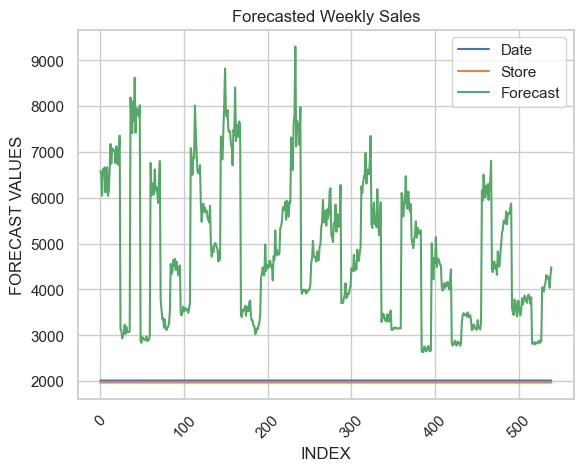

In [95]:
# Set a style for the plot
sns.set(style="whitegrid")

forecast_result2.plot()
plt.xlabel('INDEX')
plt.ylabel('FORECAST VALUES')
plt.title('Forecasted Weekly Sales')
plt.xticks(rotation = 45)  
plt.grid(True)  
plt.show()